# 03. PyTorch Computer Vision Exercises

The following is a collection of exercises based on computer vision fundamentals in PyTorch.

**Abdulrahman Abdullahi Garba**

Week 4 Solution

abdulrahmanabdullahigarba@gmail.com


In [7]:
# Check for GPU
!nvidia-smi

Sat Apr 12 13:49:26 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   38C    P8              9W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [8]:
# Import torch
import torch

# Exercises require PyTorch > 1.10.0
print(torch.__version__)

# TODO: Setup device agnostic code


2.6.0+cu124


## 1. What are 3 areas in industry where computer vision is currently being used?



*   **Autonomous Vehicles**
*   **Surveillance Systems**
*   **Medical Imaging**





## 2. Search "what is overfitting in machine learning" and write down a sentence about what you find.

**Overfitting** is when a model memorizes too much information or details about something but can not answer basic questions about it.

## 3. Search "ways to prevent overfitting in machine learning", write down 3 of the things you find and a sentence about each.
> **Note:** there are lots of these, so don't worry too much about all of them, just pick 3 and start with those.



*  **Data Regularization**: this helps a model stay simple and not overcomplicate things, so it does not get confused by small, random details in the data.
*   **Cross-Validation**: this checks the model performance on different sets of data, making sure that it does not just memorize one set.
*   **Early Stopping**: this is a technique that alerts the model when it starts to get worse on the new data, even if it is still improving on the old data.


## 4. Spend 20-minutes reading and clicking through the [CNN Explainer website](https://poloclub.github.io/cnn-explainer/).

* Upload your own example image using the "upload" button on the website and see what happens in each layer of a CNN as your image passes through it.

## 5. Load the [`torchvision.datasets.MNIST()`](https://pytorch.org/vision/stable/generated/torchvision.datasets.MNIST.html#torchvision.datasets.MNIST) train and test datasets.

In [9]:
import torchvision
from torchvision import datasets, transforms

train_data = datasets.MNIST(root=".",
                            train=True,
                            download=True,
                            transform=transforms.ToTensor())

test_data = datasets.MNIST(root=".",
                           train=False,
                           download=True,
                           transform=transforms.ToTensor())

In [10]:
train_data, test_data

(Dataset MNIST
     Number of datapoints: 60000
     Root location: .
     Split: Train
     StandardTransform
 Transform: ToTensor(),
 Dataset MNIST
     Number of datapoints: 10000
     Root location: .
     Split: Test
     StandardTransform
 Transform: ToTensor())

In [11]:
image, label = train_data[2]
image, label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 

In [12]:
image.shape, label

(torch.Size([1, 28, 28]), 4)

In [13]:
class_names = train_data.classes
class_names

['0 - zero',
 '1 - one',
 '2 - two',
 '3 - three',
 '4 - four',
 '5 - five',
 '6 - six',
 '7 - seven',
 '8 - eight',
 '9 - nine']

## 6. Visualize at least 5 different samples of the MNIST training dataset.

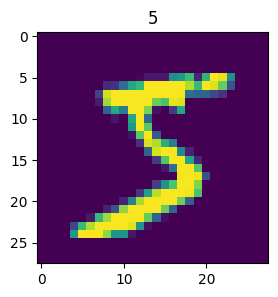

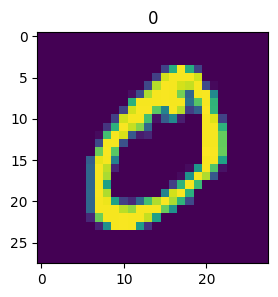

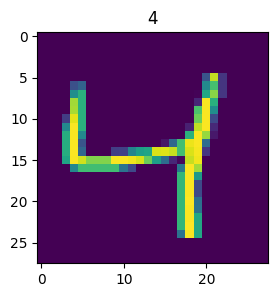

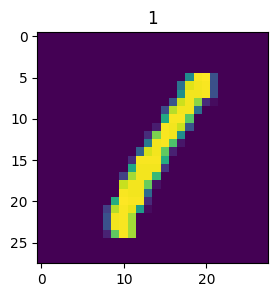

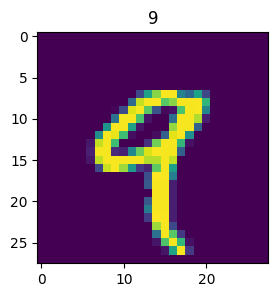

In [14]:
import matplotlib.pyplot as plt
for i in range(5):
    img = train_data[i][0]
    squeezed_img = img.squeeze()
    label = train_data[i][1]
    plt.figure(figsize=(3, 3))
    plt.imshow(squeezed_img)
    plt.title(label)
    plt.axis()

## 7. Turn the MNIST train and test datasets into dataloaders using `torch.utils.data.DataLoader`, set the `batch_size=32`.

In [15]:
from  torch.utils.data import DataLoader
train_dataloader = DataLoader(dataset=train_data, batch_size=32, shuffle=True)

test_dataloader = DataLoader(dataset=test_data, batch_size=32)

In [16]:
len(train_dataloader), len(test_dataloader)

(1875, 313)

## 8. Recreate `model_2` used in notebook 03 (the same model from the [CNN Explainer website](https://poloclub.github.io/cnn-explainer/), also known as TinyVGG) capable of fitting on the MNIST dataset.

In [17]:
from torch import nn
class MNIST_model(nn.Module):
  def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
    super().__init__()
    self.conv_block_1 = nn.Sequential(
        nn.Conv2d(in_channels=input_shape,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)
    )
    self.conv_block_2 = nn.Sequential(
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)
    )
    self.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=hidden_units*7*7,
                  out_features=output_shape)
    )
  def forward(self, x):
    x = self.conv_block_1(x)
    #print(f"Output shape of conv_block_1: {x.shape}")
    x = self.conv_block_2(x)
    #print(f"Output shape of conv_block_2: {x.shape}")
    x = self.classifier(x)
    #print(f"Output shape of classifier: {x.shape}")
    return x

In [18]:
# Model on CPU
model_mnist_cpu = MNIST_model(input_shape=1,
                          hidden_units=10,
                          output_shape=10).to("cpu")
model_mnist_cpu

MNIST_model(
  (conv_block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

## 9. Train the model you built in exercise 8. for 5 epochs on CPU and GPU and see how long it takes on each.

In [27]:
%%time
from tqdm.auto import tqdm

# Create loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_mnist_cpu.parameters(),
                            lr=0.1)

# Training loop
epochs = 5
for epoch in tqdm(range(epochs)):
  train_loss = 0
  for batch, (X, y) in enumerate(train_dataloader):
    model_mnist_cpu.train()

    # Put data on cpu
    X, y = X.to("cpu"), y.to("cpu")

    # Forward pass
    y_pred = model_mnist_cpu(X)

    # Loss Calculation
    loss = loss_fn(y_pred, y)
    train_loss += loss


    # Optimizer
    optimizer.zero_grad()

    # Loss Backward
    loss.backward()

    # Step the Optimizer
    optimizer.step()

  # Adjust train loss for number of batches
  train_loss /= len(train_dataloader)

  # Testing
  test_loss_total = 0

  # Put model on eval mode
  model_mnist_cpu.eval()

  # Turn on inference
  with torch.inference_mode():
    for batch, (X_test, y_test) in enumerate(test_dataloader):
      # Put data on cpu
      X_test, y_test = X_test.to("cpu"), y_test.to("cpu")

      test_pred = model_mnist_cpu(X_test)
      test_loss = loss_fn(test_pred, y_test)

      test_loss_total += test_loss

    # Adjust test loss for number of batches
    test_loss_total /= len(test_dataloader)

  print(f"Epoch: {epoch} | Train Loss: {train_loss:.3f} | Test Loss: {test_loss_total:.3f}")


  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 0 | Train Loss: 0.209 | Test Loss: 0.070
Epoch: 1 | Train Loss: 0.072 | Test Loss: 0.052
Epoch: 2 | Train Loss: 0.057 | Test Loss: 0.050
Epoch: 3 | Train Loss: 0.049 | Test Loss: 0.051
Epoch: 4 | Train Loss: 0.043 | Test Loss: 0.037
CPU times: user 2min 30s, sys: 1.27 s, total: 2min 31s
Wall time: 2min 32s


In [28]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [29]:
# Model on GPU
model_mnist_gpu = MNIST_model(input_shape=1,
                          hidden_units=10,
                          output_shape=10).to(device)
model_mnist_gpu

MNIST_model(
  (conv_block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [30]:
%%time
# Testing on GPU
from tqdm.auto import tqdm

# Create loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_mnist_gpu.parameters(),
                            lr=0.1)

epochs = 5
for epoch in tqdm(range(epochs)):
  # Training
  train_loss = 0
  model_mnist_cpu.train()
  for batch, (X, y) in enumerate(train_dataloader):
    # Put data on the gpu
    X, y = X.to(device), y.to(device)

    # Forward pass
    y_pred = model_mnist_gpu(X)

    # Loss Calculation
    loss = loss_fn(y_pred, y)
    train_loss += loss

    # Optimizer
    optimizer.zero_grad()

    # Loss Backward
    loss.backward()

    # Step the Optimizer
    optimizer.step()

  # Adjust train loss for number of batches
  train_loss /= len(train_dataloader)

  # Testing
  test_loss_total = 0
  # Put model on eval mode
  model_mnist_gpu.eval()

  # Turn on the inference
  with torch.inference_mode():
    for batch, (X_test, y_test) in enumerate(test_dataloader):

      # Put data on cpu
      X_test, y_test = X_test.to(device), y_test.to(device)
      test_pred = model_mnist_gpu(X_test)
      test_loss = loss_fn(test_pred, y_test)
      test_loss_total += test_loss

    # Ajdust test loss for number of batches
    test_loss_total /= len(test_dataloader)


  print(f"Epoch: {epoch} | Train Loss: {train_loss:.3f} | Test Loss: {test_loss_total:.3f}")

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 0 | Train Loss: 0.211 | Test Loss: 0.064
Epoch: 1 | Train Loss: 0.072 | Test Loss: 0.052
Epoch: 2 | Train Loss: 0.056 | Test Loss: 0.048
Epoch: 3 | Train Loss: 0.048 | Test Loss: 0.051
Epoch: 4 | Train Loss: 0.043 | Test Loss: 0.043
CPU times: user 52.5 s, sys: 439 ms, total: 53 s
Wall time: 55.3 s


## 10. Make predictions using your trained model and visualize at least 5 of them comparing the prediciton to the target label.

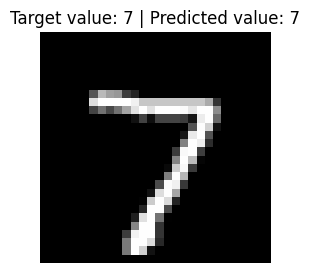

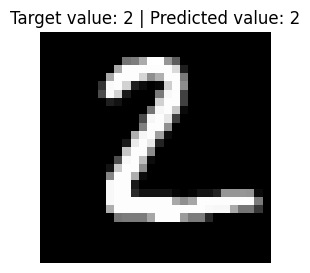

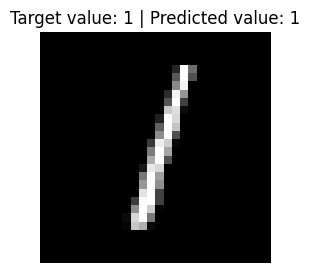

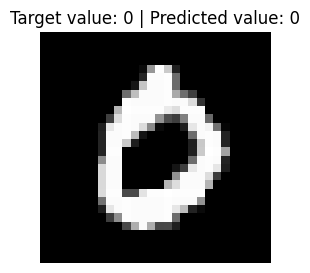

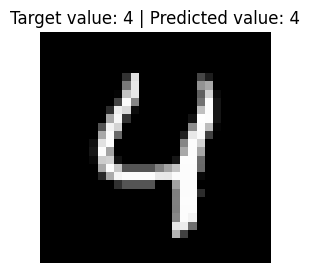

In [32]:
num_of_plot = 5
for i in range(num_of_plot):
  image = test_data[i][0]
  label = test_data[i][1]

  # Make predictions
  model_pred_logits = model_mnist_cpu(image.unsqueeze(dim=0).to("cpu"))
  model_pred_probs = torch.softmax(model_pred_logits, dim=1)
  model_pred_label = torch.argmax(model_pred_probs, dim=1)

  # Plot the image and prediction
  plt.figure(figsize=(3,3))
  plt.imshow(image.squeeze(), cmap="gray")
  plt.title(f"Target value: {label} | Predicted value: {model_pred_label.item()}")
  plt.axis(False)

## 11. Plot a confusion matrix comparing your model's predictions to the truth labels.

In [33]:
# See if torchmetrics exists, if not, install it
try:
    import torchmetrics, mlxtend
    print(f"mlxtend version: {mlxtend.__version__}")
    assert int(mlxtend.__version__.split(".")[1]) >= 19, "mlxtend verison should be 0.19.0 or higher"
except:
    !pip install -q torchmetrics -U mlxtend # <- Note: If you're using Google Colab, this may require restarting the runtime
    import torchmetrics, mlxtend
    print(f"mlxtend version: {mlxtend.__version__}")

mlxtend version: 0.23.4


In [34]:
# Import mlxtend upgraded version
import mlxtend
print(mlxtend.__version__)
assert int(mlxtend.__version__.split(".")[1]) >= 19 # should be version 0.19.0 or higher

0.23.4


In [35]:
from tqdm.auto import tqdm

y_preds = []
model_mnist_cpu.eval()
with torch.inference_mode():
  for batch, (X, y) in tqdm(enumerate(test_dataloader)):
    # Make sure data is on the right device
    X, y = X.to("cpu"), y.to("cpu")

    # Do the forward pass
    y_pred_logits = model_mnist_cpu(X)

    # logits -> prediction probabilities -> predictions labels
    y_pred_labels = torch.argmax(torch.softmax(y_pred_logits, dim=1), dim=1)

    # Append labels to the prediction list
    y_preds.append(y_pred_labels)

  y_preds = torch.cat(y_preds)
len(y_preds)

0it [00:00, ?it/s]

10000

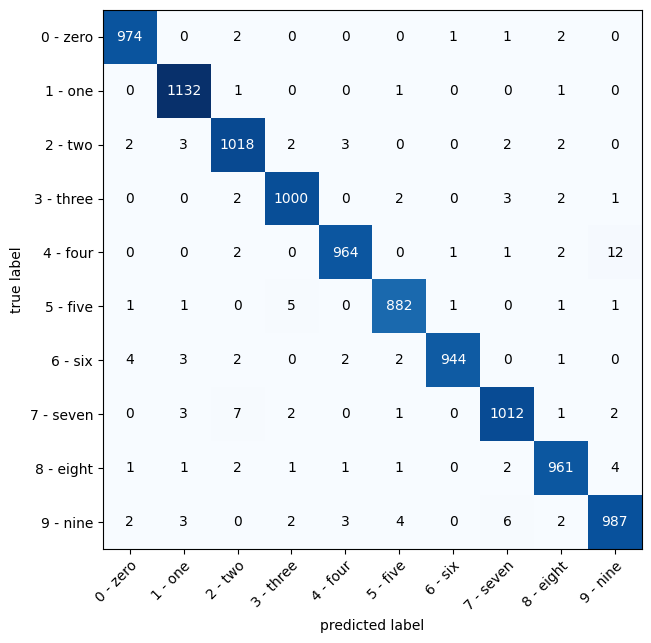

In [36]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

# Setup confusion matrix
confmat = ConfusionMatrix(num_classes=len(class_names), task="multiclass")
confmat_tensor = confmat(preds=y_preds,
                         target=test_data.targets)

# Plot the confusion matrix
fix, ax = plot_confusion_matrix(conf_mat=confmat_tensor.numpy(),
                                class_names=class_names,
                                figsize=(10, 7))

## 12. Create a random tensor of shape `[1, 3, 64, 64]` and pass it through a `nn.Conv2d()` layer with various hyperparameter settings (these can be any settings you choose), what do you notice if the `kernel_size` parameter goes up and down?

In [37]:
random_tensor = torch.rand([1, 3, 64, 64])
random_tensor.shape

torch.Size([1, 3, 64, 64])

In [38]:
conv_layer = nn.Conv2d(in_channels=3,
                       out_channels=10,
                       kernel_size=6,
                       stride=1,
                       padding=1)

random_tensor_conv = conv_layer(random_tensor)
random_tensor_conv.shape

torch.Size([1, 10, 61, 61])

What I notice briefly is when kernel_size gets bigger, the filter sees more of the image at once, like zooming out--but the output image can get smaller. Smaller kernels look at tiny parts, like zooming in, and usually keep the output size closer to the input.

## 13. Use a model similar to the trained `model_2` from notebook 03 to make predictions on the test [`torchvision.datasets.FashionMNIST`](https://pytorch.org/vision/main/generated/torchvision.datasets.FashionMNIST.html) dataset.
* Then plot some predictions where the model was wrong alongside what the label of the image should've been.
* After visualing these predictions do you think it's more of a modelling error or a data error?
* As in, could the model do better or are the labels of the data too close to each other (e.g. a "Shirt" label is too close to "T-shirt/top")?

In [39]:
import torchvision
from torchvision import datasets, transforms

train_data = datasets.FashionMNIST(root=".",
                                   train=True,
                                   download=True,
                                   transform=transforms.ToTensor())

test_data = datasets.FashionMNIST(root=".",
                                  train=False,
                                  download=True,
                                  transform=transforms.ToTensor()
                                  )
train_data, test_data

100%|██████████| 26.4M/26.4M [00:02<00:00, 12.1MB/s]
100%|██████████| 29.5k/29.5k [00:00<00:00, 194kB/s]
100%|██████████| 4.42M/4.42M [00:01<00:00, 3.66MB/s]
100%|██████████| 5.15k/5.15k [00:00<00:00, 14.2MB/s]


(Dataset FashionMNIST
     Number of datapoints: 60000
     Root location: .
     Split: Train
     StandardTransform
 Transform: ToTensor(),
 Dataset FashionMNIST
     Number of datapoints: 10000
     Root location: .
     Split: Test
     StandardTransform
 Transform: ToTensor())

In [40]:
img, label = train_data[0]
img, label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [41]:
img.shape, label

(torch.Size([1, 28, 28]), 9)

In [42]:
class_names = train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

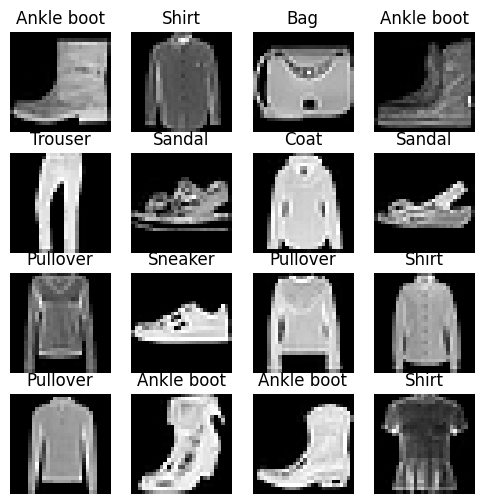

In [43]:
# Visualize the images
torch.random.manual_seed(42)
fig = plt.figure(figsize=(6, 6))
rows, cols = 4, 4
for i in range(1, rows * cols + 1):
    random_idx = torch.randint(0, len(train_data), size=[1]).item()
    img, label = train_data[random_idx]
    fig.add_subplot(rows, cols, i)
    plt.imshow(img.squeeze(), cmap="gray")
    plt.title(class_names[label])
    plt.axis(False);

In [44]:
from  torch.utils.data import DataLoader
train_dataloader = DataLoader(dataset=train_data, batch_size=32, shuffle=True)

test_dataloader = DataLoader(dataset=test_data, batch_size=32)

In [45]:
len(train_dataloader), len(test_dataloader)

(1875, 313)

In [46]:
# Create the FashionMNISTModel
from torch import nn
class FashionMNISTModel(nn.Module):
  def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
    super().__init__()
    self.conv_block_1 = nn.Sequential(
        nn.Conv2d(in_channels=input_shape,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)
    )
    self.conv_block_2 = nn.Sequential(
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)
    )
    self.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=hidden_units*7*7,
                  out_features=output_shape)
    )
  def forward(self, x):
    x = self.conv_block_1(x)
    x = self.conv_block_2(x)
    x = self.classifier(x)
    return x

In [47]:
# An instance of the FashionMNISTModel
fashion_model = FashionMNISTModel(input_shape=1,
                                  hidden_units=10,
                                  output_shape=len(class_names)).to(device)
fashion_model

FashionMNISTModel(
  (conv_block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

Training the model

In [50]:
from tqdm.auto import tqdm

# Create loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=fashion_model.parameters(),
                            lr=0.01)

# Training loop
epochs = 3
for epoch in tqdm(range(epochs)):
  train_loss = 0
  for batch, (X, y) in enumerate(train_dataloader):
    fashion_model.train()

    # Put data on cpu
    X, y = X.to(device), y.to(device)

    # Forward pass
    y_pred = fashion_model(X)

    # Loss Calculation
    loss = loss_fn(y_pred, y)
    train_loss += loss


    # Optimizer
    optimizer.zero_grad()

    # Loss Backward
    loss.backward()

    # Step the Optimizer
    optimizer.step()

  # Adjust train loss for number of batches
  train_loss /= len(train_dataloader)

  # Testing
  test_loss_total = 0

  # Put model on eval mode
  fashion_model.eval()

  # Turn on inference
  with torch.inference_mode():
    for batch, (X_test, y_test) in enumerate(test_dataloader):
      # Put data on cpu
      X_test, y_test = X_test.to(device), y_test.to(device)

      test_pred = fashion_model(X_test)
      test_loss = loss_fn(test_pred, y_test)

      test_loss_total += test_loss

    # Adjust test loss for number of batches
    test_loss_total /= len(test_dataloader)

  print(f"Epoch: {epoch} | Train Loss: {train_loss:.3f} | Test Loss: {test_loss_total:.3f}")

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0 | Train Loss: 0.537 | Test Loss: 0.490
Epoch: 1 | Train Loss: 0.456 | Test Loss: 0.459
Epoch: 2 | Train Loss: 0.421 | Test Loss: 0.449


Make Predictions